# CIS-545 Model Performance Visualizations

## Import statements

In [ ]:
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3
from keras import models, layers, optimizers
from keras.utils import image_dataset_from_directory,load_img,img_to_array
from keras.models import load_model
import numpy as np
import os
import random
from sklearn import metrics
import seaborn as sns
import seaborn.objects as so
import pandas as pd
import matplotlib.pyplot as plt

## Load In and Evaluate Inceptionv3 Model

In [ ]:
test_dataset = image_dataset_from_directory("dataset/test", image_size=(250, 250), batch_size=32)
model_iv3 = load_model("malware_vs_benign_inceptionv3.h5")

# Evaluate the model on the test dataset
evaluation_result = model_iv3.evaluate(test_dataset)

# Display the evaluation metrics
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])

Found 1000 files belonging to 2 classes.
32/32 [==============================] - 141s 4s/step - loss: 0.2507 - accuracy: 0.9710
Loss: 0.25065016746520996
Accuracy: 0.9710000157356262


## Load In and Evaluate Resnet50 Model

In [ ]:
test_dataset = image_dataset_from_directory("dataset/test", image_size=(250, 250), batch_size=32)
model_rn50 = load_model("malware_vs_benign_resnet50.h5")

# Evaluate the model on the test dataset
evaluation_result = model_rn50.evaluate(test_dataset)

# Display the evaluation metrics
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])

Found 1000 files belonging to 2 classes.
32/32 [==============================] - 240s 7s/step - loss: 0.4467 - accuracy: 0.9830
Loss: 0.446725070476532
Accuracy: 0.9829999804496765


## Creating confusion matrix for Inception v3 model


In [ ]:
benign_labels = np.zeros(500)
malware_labels = np.ones(500)

y_true = np.concatenate((benign_labels, malware_labels))

In [ ]:

benign_predictions_iv3 = []
malware_predictions_iv3 = []
benign_proba_iv3 = []
malware_proba_iv3 = []

path1 = "dataset/test/benign/"
benign_files = os.listdir("dataset/test/benign")

benign_image_files = [file for file in benign_files if file.endswith(('.png'))]

for i, file in enumerate(benign_image_files):
    image = load_img(path1+file,target_size=(250,250))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model_iv3.predict(img_array)
    prediction_label = None
    benign_proba_iv3.append(prediction[0][0])
    if prediction[0][0] > 0.5:
        benign_predictions_iv3.append(1)
    else:
        benign_predictions_iv3.append(0)

path2 = "dataset/test/malware/"
malware_files = os.listdir(path2)

malware_image_files = [file for file in malware_files if file.endswith(('.png'))]

for i, file in enumerate(malware_image_files):
    image = load_img(path2+file,target_size=(250,250))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model_iv3.predict(img_array)
    print(f"Filename: {file}")
    prediction_label = None
    malware_proba_iv3.append(prediction[0][0])
    if prediction[0][0] > 0.5:
        malware_predictions_iv3.append(1)
    else:
        malware_predictions_iv3.append(0)


1/1 [==============================] - 0s 258ms/step
Filename: 5be6399f7b50513ee69d2819e0407d2c3bb77643e8c0341c9d04837f13b9bbdb.png
1/1 [==============================] - 0s 257ms/step
Filename: 84d5fce7b1ecaa4f321f3c88c5c84288a217e14469cf913fcd02f0102bfc6b92.png
1/1 [==============================] - 0s 280ms/step
Filename: 7a0d885809b7f22427cb5b241e179f0849bb9f2359b8bb752be959e4199b78d4.png
1/1 [==============================] - 0s 262ms/step
Filename: 48e3617ce7eda8fec8fde05ab5f9682db730f43ed7509cf921f1422804c9d9ee.png
1/1 [==============================] - 0s 280ms/step
Filename: 64f60957d37b3e6f918101bfec0c96ed7b4d991255603e28033b6b8ecdaed233.png
1/1 [==============================] - 0s 240ms/step
Filename: 32ba6165d9456b85dac2ab4e25c6efd5849dbb235ad2fb4c392a3d7f28955c39.png
1/1 [==============================] - 0s 258ms/step
Filename: 890e94a7892d1b248472f1082070bc5f310234ed96f15a5103e99297d638a519.png
1/1 [==============================] - 0s 228ms/step
Filename: 04b7f03fc58b3

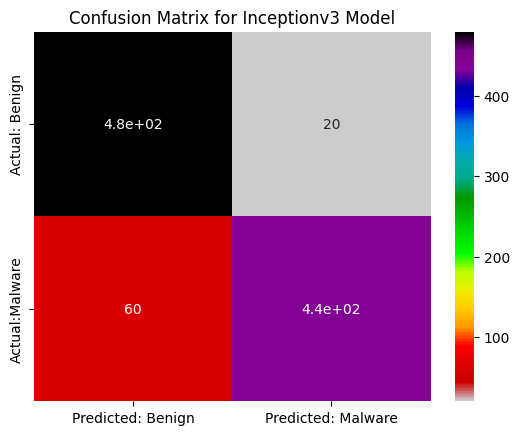

In [ ]:
y_pred_iv3 = benign_predictions_iv3.copy()
y_pred_iv3.extend(malware_predictions_iv3)

y_proba_iv3 = benign_proba_iv3.copy()
y_proba_iv3.extend(malware_proba_iv3)

cm_iv3 = metrics.confusion_matrix(y_true, y_pred_iv3)
cm_df_iv3 = pd.DataFrame(cm_iv3, columns=['Predicted: Benign', 'Predicted: Malware'], index=['Actual: Benign', 'Actual:Malware'],)
sns.heatmap(cm_df_iv3, cmap = 'nipy_spectral_r', annot = True)
plt.title('Confusion Matrix for Inceptionv3 Model')
plt.show()

In [ ]:
print(metrics.classification_report(y_true, y_pred_iv3, target_names = ['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.89      0.96      0.92       500
     Malware       0.96      0.88      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [ ]:
false_positives_iv3 = cm_df_iv3.iloc[0,1]/cm_df_iv3.sum().sum()
false_negatives_iv3 = cm_df_iv3.iloc[1,0]/cm_df_iv3.sum().sum()
accuracy_metric_iv3 = (cm_df_iv3.iloc[0,0] + cm_df_iv3.iloc[1,1])/cm_df_iv3.sum().sum()


## Creating confusion matrix for Resnet 50 model

In [ ]:
benign_predictions_rn50 = []
malware_predictions_rn50 = []
benign_proba_rn50 = []
malware_proba_rn50 = []

path1 = "dataset/test/benign/"
benign_files = os.listdir("dataset/test/benign")

benign_image_files = [file for file in benign_files if file.endswith(('.png'))]

for i, file in enumerate(benign_image_files):
    image = load_img(path1+file,target_size=(250,250))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model_rn50.predict(img_array)
    prediction_label = None
    benign_proba_rn50.append(prediction[0][0])
    if prediction[0][0] > 0.5:
        benign_predictions_rn50.append(1)
    else:
        benign_predictions_rn50.append(0)

path2 = "dataset/test/malware/"
malware_files = os.listdir(path2)

malware_image_files = [file for file in malware_files if file.endswith(('.png'))]

for i, file in enumerate(malware_image_files):
    image = load_img(path2+file,target_size=(250,250))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model_rn50.predict(img_array)
    print(f"Filename: {file}")
    prediction_label = None
    malware_proba_rn50.append(prediction[0][0])
    if prediction[0][0] > 0.5:
        malware_predictions_rn50.append(1)
    else:
        malware_predictions_rn50.append(0)


1/1 [==============================] - 0s 257ms/step
Filename: 5be6399f7b50513ee69d2819e0407d2c3bb77643e8c0341c9d04837f13b9bbdb.png
1/1 [==============================] - 0s 227ms/step
Filename: 84d5fce7b1ecaa4f321f3c88c5c84288a217e14469cf913fcd02f0102bfc6b92.png
1/1 [==============================] - 0s 230ms/step
Filename: 7a0d885809b7f22427cb5b241e179f0849bb9f2359b8bb752be959e4199b78d4.png
1/1 [==============================] - 0s 229ms/step
Filename: 48e3617ce7eda8fec8fde05ab5f9682db730f43ed7509cf921f1422804c9d9ee.png
1/1 [==============================] - 0s 243ms/step
Filename: 64f60957d37b3e6f918101bfec0c96ed7b4d991255603e28033b6b8ecdaed233.png
1/1 [==============================] - 0s 231ms/step
Filename: 32ba6165d9456b85dac2ab4e25c6efd5849dbb235ad2fb4c392a3d7f28955c39.png
1/1 [==============================] - 0s 239ms/step
Filename: 890e94a7892d1b248472f1082070bc5f310234ed96f15a5103e99297d638a519.png
1/1 [==============================] - 0s 241ms/step
Filename: 04b7f03fc58b3

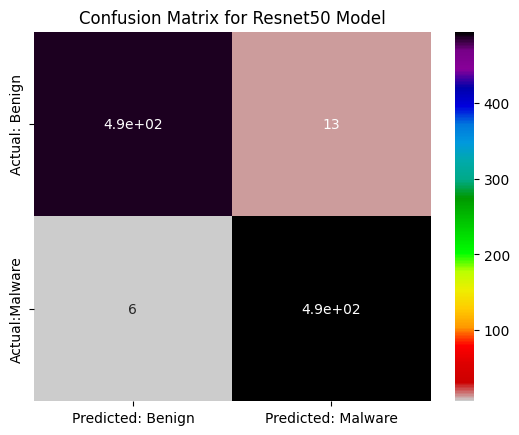

In [ ]:
y_pred_rn50 = benign_predictions_rn50.copy()
y_pred_rn50.extend(malware_predictions_rn50)

y_proba_rn50 = benign_proba_rn50.copy()
y_proba_rn50.extend(malware_proba_rn50)

cm_rn50 = metrics.confusion_matrix(y_true, y_pred_rn50)
cm_df_rn50 = pd.DataFrame(cm_rn50, columns=['Predicted: Benign', 'Predicted: Malware'], index=['Actual: Benign', 'Actual:Malware'],)
sns.heatmap(cm_df_rn50, cmap = 'nipy_spectral_r', annot = True)
plt.title('Confusion Matrix for Resnet50 Model')
plt.show()

In [ ]:
print(metrics.classification_report(y_true, y_pred_rn50, target_names = ['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98       500
     Malware       0.97      0.99      0.98       500

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
false_positives_rn50 = cm_df_rn50.iloc[0,1]/cm_df_rn50.sum().sum()
false_negatives_rn50 = cm_df_rn50.iloc[1,0]/cm_df_rn50.sum().sum()
accuracy_metric_rn50 = (cm_df_rn50.iloc[0,0] + cm_df_rn50.iloc[1,1])/cm_df_rn50.sum().sum()

## Bar chart comparing accuracy across models

In [ ]:
accuracy_table = pd.DataFrame({'Model': ['SOINN All', 'SOINN .exe', 'Inception v3', 'Resnet50'],
                               'Accuracy': [0.517, 0.737, accuracy_metric_iv3, accuracy_metric_rn50],
                               'False positive':[0.245, 0.121, false_positives_iv3, false_positives_rn50],
                               'False negative':[0.238, 0.142, false_negatives_iv3, false_negatives_rn50]})

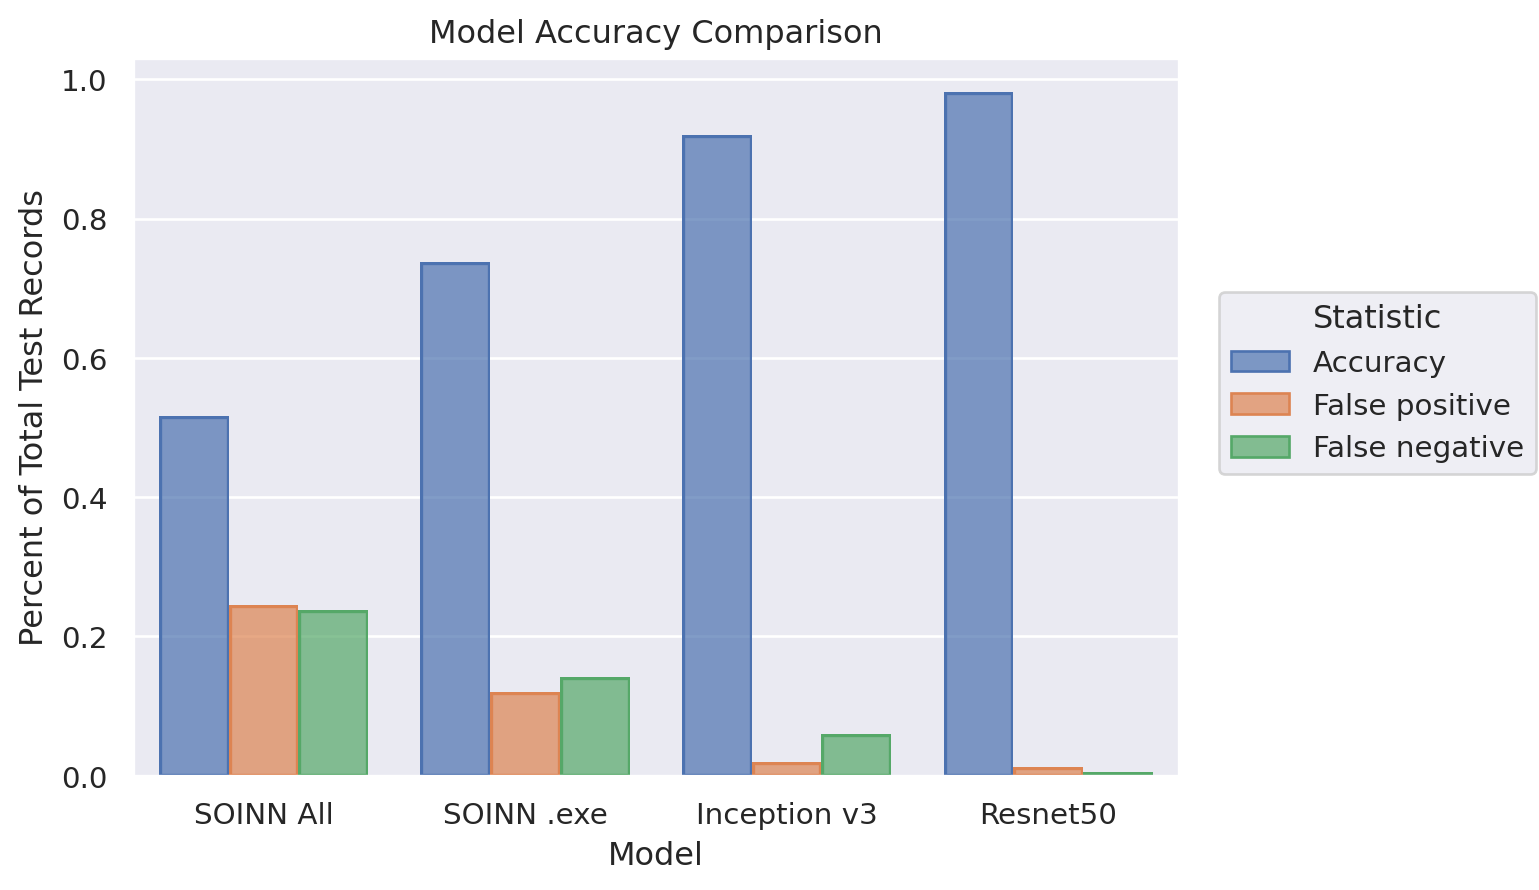

In [ ]:
(
    accuracy_table.melt(id_vars = 'Model', var_name = 'Statistic')
    .pipe(so.Plot, x = 'Model', y = 'value', color = 'Statistic')
    .add(so.Bar(), so.Dodge())
    .label(y = 'Percent of Total Test Records', title='Model Accuracy Comparison')
)

### Plot ROC Curves

In [ ]:
fpr_iv3, tpr_iv3, threshold_iv3 = metrics.roc_curve(y_true, y_proba_iv3)
roc_df_iv3 = pd.DataFrame({'fpr_iv3':fpr_iv3, 'tpr_iv3':tpr_iv3, 'threshold_iv3':threshold_iv3})

fpr_rn50, tpr_rn50, threshold_rn50 = metrics.roc_curve(y_true, y_proba_rn50)
roc_df_rn50 = pd.DataFrame({'fpr_rn50':fpr_rn50, 'tpr_rn50':tpr_rn50, 'threshold_rn50':threshold_rn50})

roc_all = pd.concat([roc_df_iv3, roc_df_rn50], axis=1)

fpr_iv3  tpr_iv3  threshold_iv3  fpr_rn50  tpr_rn50  threshold_rn50
0      0.000    0.000   2.000000e+00     0.000     0.000        2.000000
1      0.000    0.006   1.000000e+00     0.006     0.968        1.000000
2      0.000    0.014   9.999988e-01     0.006     0.970        1.000000
3      0.000    0.018   9.999986e-01     0.010     0.970        1.000000
4      0.000    0.088   9.999699e-01     0.010     0.974        0.999999
..       ...      ...            ...       ...       ...             ...
102    0.452    0.998   7.993830e-31       NaN       NaN             NaN
103    0.578    0.998   1.752159e-36       NaN       NaN             NaN
104    0.582    0.998   1.482914e-36       NaN       NaN             NaN
105    0.614    0.998   1.451881e-38       NaN       NaN             NaN
106    1.000    1.000   0.000000e+00       NaN       NaN             NaN

[107 rows x 6 columns]

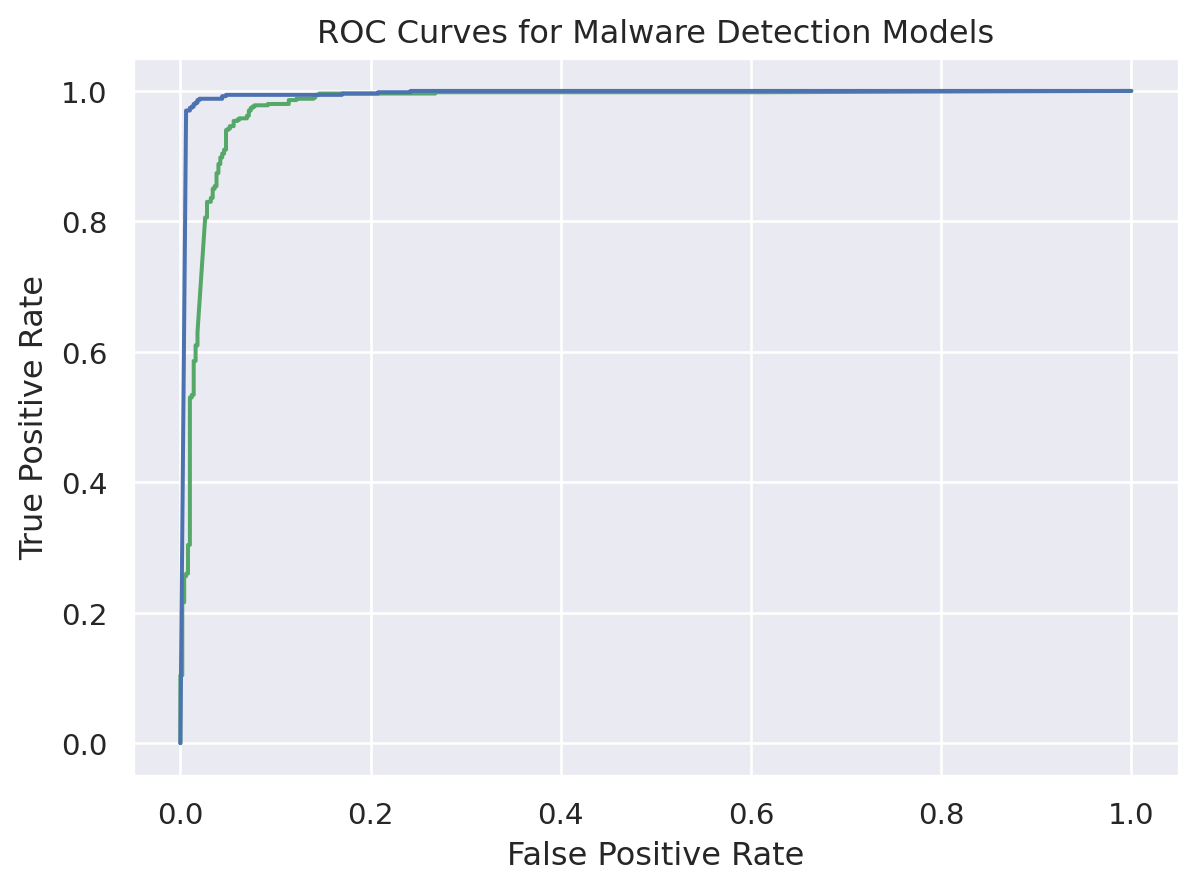

In [ ]:
(
    so.Plot()
    .add(so.Line(color='g'), data=roc_all, x='fpr_iv3', y='tpr_iv3', legend=True, label='tpr_iv3')
    .add(so.Line(color ='b'), data = roc_all, x='fpr_rn50', y='tpr_rn50', legend=True, label='threshold_rn50')
    #.add(so.Line(linestyle='dashed'),
         #data = pd.DataFrame({
             #'x':[0, 1],
             #'y':[0,1]
         #}), x='x', y='y'), #label='Random guess')
    .label(x='False Positive Rate',
           y='True Positive Rate',
           title='ROC Curves for Malware Detection Models',
           legend = 'Model')

)

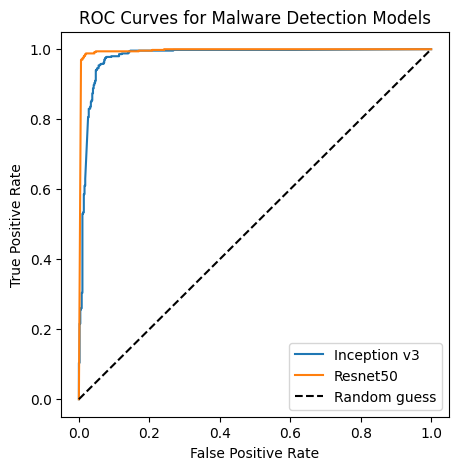

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(roc_all['fpr_iv3'], roc_all['tpr_iv3'], label = 'Inception v3')
plt.plot(roc_all['fpr_rn50'], roc_all['tpr_rn50'], label = 'Resnet50')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), label='Random guess', linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Malware Detection Models')
plt.legend()
plt.show()